# Exploritory Analysis

The purpose of this workbook is to get familar with the dataset, before starting to build the workflow to predict the load repayments

In [46]:
import polars as pl

# Read the datasets
train_data = pl.read_csv("../Data/Raw/train.csv")
test_data = pl.read_csv("../Data/Raw/test.csv")

# Add a column to identify the source of each dataset
train_data = train_data.with_columns(pl.lit("train").alias("source"))
test_data = test_data.with_columns(pl.lit("test").alias("source"))

# Concatenate both datasets
combined_data = pl.concat([train_data, test_data], how="diagonal")

In [47]:
combined_data

id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back,source
i64,f64,f64,i64,f64,f64,str,str,str,str,str,str,f64,str
0,29367.99,0.084,736,2528.42,13.67,"""Female""","""Single""","""High School""","""Self-employed""","""Other""","""C3""",1.0,"""train"""
1,22108.02,0.166,636,4593.1,12.92,"""Male""","""Married""","""Master's""","""Employed""","""Debt consolidation""","""D3""",0.0,"""train"""
2,49566.2,0.097,694,17005.15,9.76,"""Male""","""Single""","""High School""","""Employed""","""Debt consolidation""","""C5""",1.0,"""train"""
3,46858.25,0.065,533,4682.48,16.1,"""Female""","""Single""","""High School""","""Employed""","""Debt consolidation""","""F1""",1.0,"""train"""
4,25496.7,0.053,665,12184.43,10.21,"""Male""","""Married""","""High School""","""Employed""","""Other""","""D1""",1.0,"""train"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…
848558,92835.97,0.068,744,29704.0,13.48,"""Female""","""Single""","""Bachelor's""","""Employed""","""Debt consolidation""","""B2""",null,"""test"""
848559,48846.47,0.091,634,20284.33,9.58,"""Female""","""Married""","""High School""","""Employed""","""Debt consolidation""","""D4""",null,"""test"""
848560,20668.52,0.096,718,26387.55,9.0,"""Male""","""Single""","""Master's""","""Employed""","""Debt consolidation""","""C4""",null,"""test"""


In [48]:

# ---- Analyze missing values ----
# Count missing values per column
missing_summary = (
    combined_data.select([
        pl.col(col).null_count().alias(col)
        for col in combined_data.columns
    ])
    .transpose(include_header=True, header_name="column", column_names=["missing_count"])
    .with_columns([
        (pl.col("missing_count") / combined_data.height * 100).alias("missing_pct")
    ])
    .sort("missing_pct", descending=True)
)

print("Missing Values Summary:")
missing_summary


Missing Values Summary:


column,missing_count,missing_pct
str,u32,f64
"""loan_paid_back""",254569,30.000012
"""id""",0,0.0
"""annual_income""",0,0.0
"""debt_to_income_ratio""",0,0.0
"""credit_score""",0,0.0
…,…,…
"""education_level""",0,0.0
"""employment_status""",0,0.0
"""loan_purpose""",0,0.0


# Categorical Feature Translation

Next, let's look at converting the categorical features

In [49]:
# Gender

# Can be either Male, Female, or Other

# One-hot encode Gender column
combined_data = combined_data.to_dummies(columns=["gender"])

In [50]:
# Marital Status

# Can be either Single, Married, Divorced, Widowed

# Let's one-hot encode

# Also add 2 other categories 

# Currently Single (I.e. Suggested to not be in a relationship)

# Marrage Experience (Has at some stage been married)

# One-hot encode Marital Status and add engineered features
combined_data = (
    combined_data
    .with_columns([
        # Feature: Currently Single 
        (pl.col("marital_status").is_in(["Widowed", "Single", "Divorced"])).cast(pl.Int8).alias("currently_single"),

        # Feature: Has marriage experience (Married, Divorced, Widowed)
        (pl.col("marital_status").is_in(["Married", "Divorced", "Widowed"]))
        .cast(pl.Int8)
        .alias("marriage_experience")
    ])
    .to_dummies(columns=["marital_status"])  # One-hot encode
)

In [51]:
# Education Level 

# Let's one-hot encode


# But also, let's also add an ordinal features to consider

# Define category orders
edu_order_1 = ["Other", "High School", "Bachelor's", "Master's", "PhD"]
edu_order_2 = ["High School", "Other", "Bachelor's", "Master's", "PhD"]

# Create mapping dictionaries
edu_map_1 = {level: idx for idx, level in enumerate(edu_order_1)}
edu_map_2 = {level: idx for idx, level in enumerate(edu_order_2)}

# One-hot encode + ordinal features
combined_data = (
    combined_data
    .with_columns([
        # Ordinal encoding 1
        pl.col("education_level").replace_strict(edu_map_1).alias("edu_ord_1"),

        # Ordinal encoding 2
        pl.col("education_level").replace_strict(edu_map_2).alias("edu_ord_2"),
    ])
    .to_dummies(columns=["education_level"])  # One-hot encode
)

In [52]:
# Employment Status

# Let's one-hot encode

# Let's also add a feature to identfy if they are employeed ("Self-employed" or "Employed")

# One-hot encode + add employment indicator
combined_data = (
    combined_data
    .with_columns([
        # Feature: is employed (Employed or Self-employed)
        pl.when(pl.col("employment_status").is_in(["Employed", "Self-employed"]))
        .then(1)
        .otherwise(0)
        .alias("is_employed")
    ])
    .to_dummies(columns=["employment_status"])  # One-hot encode categories
)

In [53]:
# loan_purpose	

# Let's one-hot encode

combined_data = (
    combined_data.to_dummies(columns=["loan_purpose"])  # One-hot encode categories
)


In [54]:
# Grade Sub Grade


# These should be ordered from A1 to FX

# Extract letter and number parts
combined_data = combined_data.with_columns([
    pl.col("grade_subgrade").str.slice(0, 1).alias("grade_letter"),
    pl.col("grade_subgrade").str.slice(1).cast(pl.Int8).alias("grade_number")
])

# Map letters to ordinal numbers
letters = sorted(combined_data.select("grade_letter").unique().to_series().to_list())
letter_map = {letter: idx for idx, letter in enumerate(letters)}

# Add numeric ordinal column for letters
combined_data = combined_data.with_columns([
    pl.col("grade_letter").replace_strict(letter_map).alias("grade_letter_ord")
])

# Optionally create full sequential ordinal: A1=1, A2=2, ..., B1=6, etc.
combined_data = combined_data.with_columns([
    (pl.col("grade_letter_ord") * 5 + pl.col("grade_number")).alias("grade_seq_ord")
])

# Drop the original column
combined_data = combined_data.drop(['grade_letter', 'grade_subgrade'])

### Feature analysis

Let's look at the distribution of each feature, as well as how it compared to the load status

In [55]:
train_combined_data = combined_data.filter(pl.col('source') == 'train')
train_combined_data.describe()

statistic,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender_Female,gender_Male,gender_Other,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Widowed,education_level_Bachelor's,education_level_High School,education_level_Master's,education_level_Other,education_level_PhD,employment_status_Employed,employment_status_Retired,employment_status_Self-employed,employment_status_Student,employment_status_Unemployed,loan_purpose_Business,loan_purpose_Car,loan_purpose_Debt consolidation,loan_purpose_Education,loan_purpose_Home,loan_purpose_Medical,loan_purpose_Other,loan_purpose_Vacation,loan_paid_back,source,currently_single,marriage_experience,edu_ord_1,edu_ord_2,is_employed,grade_number,grade_letter_ord,grade_seq_ord
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,"""593994""",593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0,593994.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",296996.5,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.515451,0.478273,0.006276,0.035879,0.466737,0.486273,0.011111,0.470722,0.309081,0.156731,0.044911,0.018556,0.758669,0.027699,0.088351,0.020086,0.105195,0.059433,0.097826,0.54663,0.061686,0.074273,0.038394,0.107533,0.014224,0.79882,null,0.533263,0.513727,1.794939,1.53077,0.84702,2.987811,2.395979,14.967705
"""std""",171471.442236,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.499762,0.499528,0.078973,0.185989,0.498893,0.499812,0.104823,0.499142,0.462115,0.363547,0.207109,0.13495,0.427891,0.164109,0.283805,0.140295,0.306804,0.236434,0.297079,0.497821,0.240584,0.262216,0.192146,0.30979,0.118413,0.400883,null,0.498893,0.499812,0.823183,1.136667,0.359968,1.4024,0.985106,5.115538
"""min""",0.0,6002.43,0.011,395.0,500.09,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""train""",0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
"""25%""",148498.0,27934.4,0.072,646.0,10279.62,10.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,null,0.0,0.0,1.0,0.0,1.0,2.0,2.0,12.0
"""50%""",296997.0,46557.68,0.096,682.0,15000.22,12.37,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,null,1.0,1.0,2.0,2.0,1.0,3.0,2.0,14.0
"""75%""",445495.0,60981.32,0.156,719.0,18858.58,13.68,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,null,1.0,1.0,2.0,2.0,1.0,4.0,3.0,18.0
"""max""",593993.0,393381.74,0.627,849.0,48959.95,20.99,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"""train""",1.0,1.0,4.0,4.0,1.0,5.0,5.0,30.0


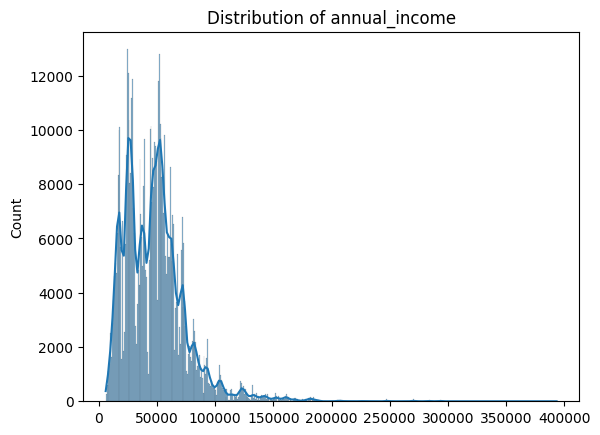

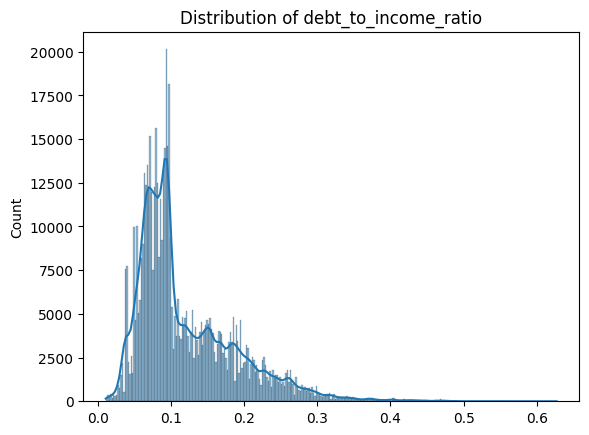

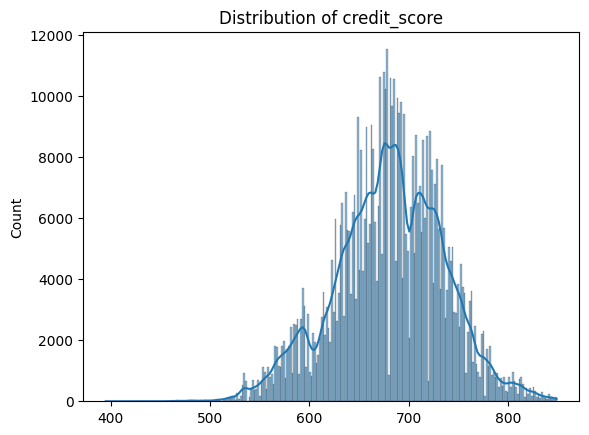

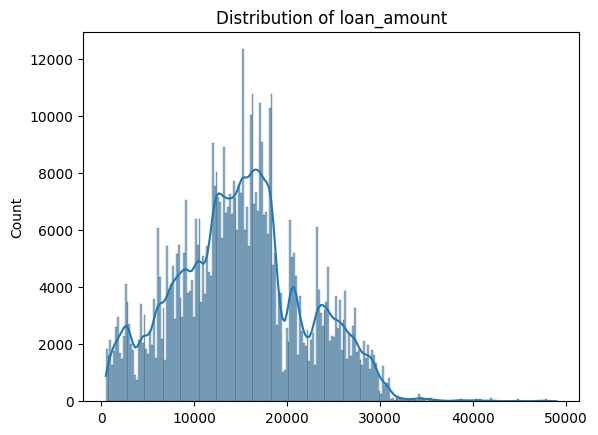

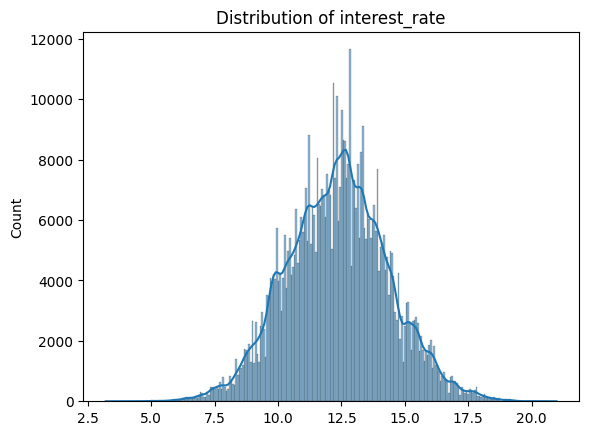

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['annual_income', 'debt_to_income_ratio', 'credit_score',
                'loan_amount', 'interest_rate']

for col in numeric_cols:
    sns.histplot(train_combined_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


We can see that the majority of the continuoius features are normal-like distributions

The Annual Income & Debt to Income ratio features are quite skewed though

It may be worth applying a transformaiton to both of these columns to get it looking more normal

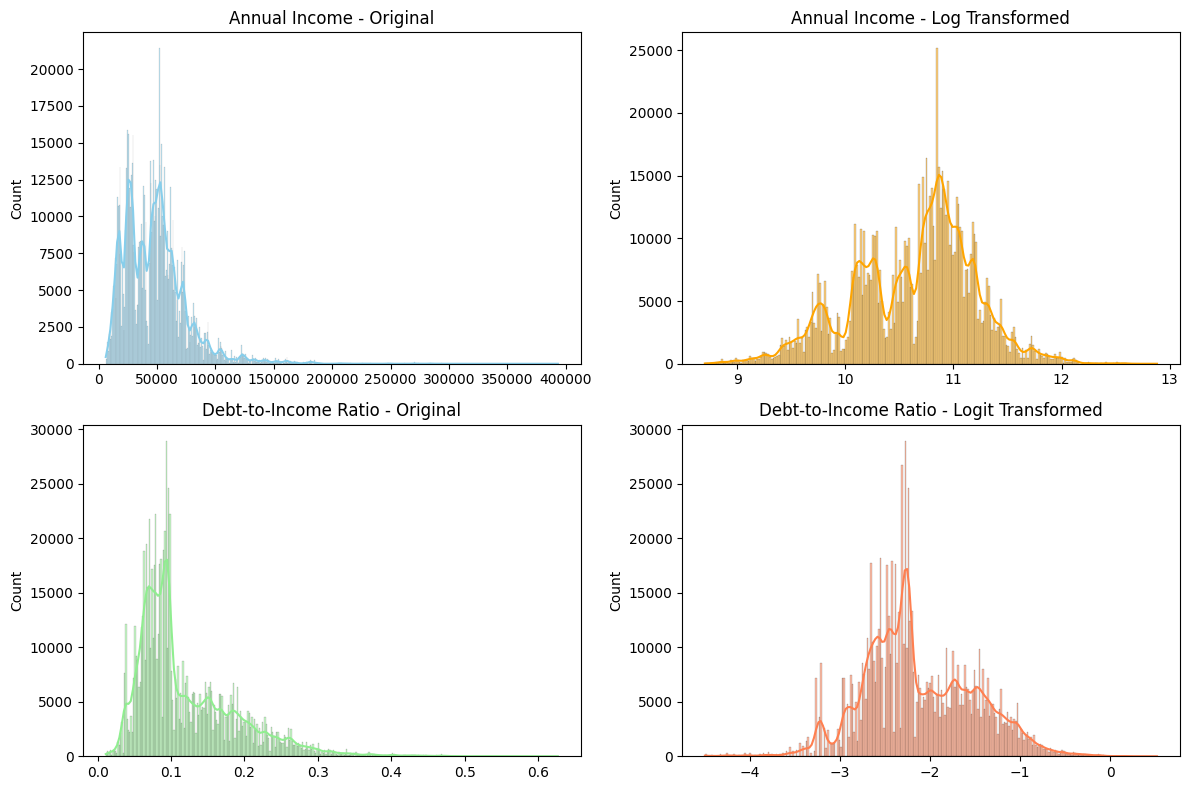

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Transformations 
# Annual Income - Apply log1p transformation (log(1 + x)) to handle zero values safely
# Debt Income Ratio - Apply logit transformation (Values are between 0 and 1)
combined_data = combined_data.with_columns([
    (pl.col("annual_income").log1p()).alias("annual_income_log"),
    (pl.col("debt_to_income_ratio") / (1 - pl.col("debt_to_income_ratio"))).log().alias("debt_to_income_ratio_logit")
])


# --- Plotting directly from Polars (no pandas) ---
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Annual Income
sns.histplot(combined_data["annual_income"].to_numpy(), kde=True, ax=axes[0,0], color="skyblue")
axes[0,0].set_title("Annual Income - Original")

sns.histplot(combined_data["annual_income_log"].to_numpy(), kde=True, ax=axes[0,1], color="orange")
axes[0,1].set_title("Annual Income - Log Transformed")

# Debt-to-Income Ratio
sns.histplot(combined_data["debt_to_income_ratio"].to_numpy(), kde=True, ax=axes[1,0], color="lightgreen")
axes[1,0].set_title("Debt-to-Income Ratio - Original")

sns.histplot(combined_data["debt_to_income_ratio_logit"].to_numpy(), kde=True, ax=axes[1,1], color="coral")
axes[1,1].set_title("Debt-to-Income Ratio - Logit Transformed")

plt.tight_layout()
plt.show()

Looks a bit better

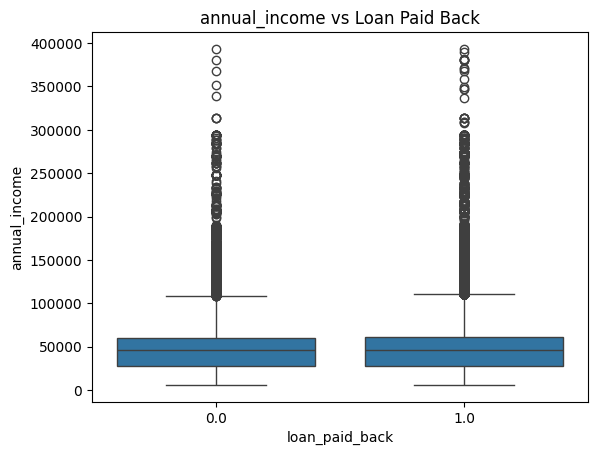

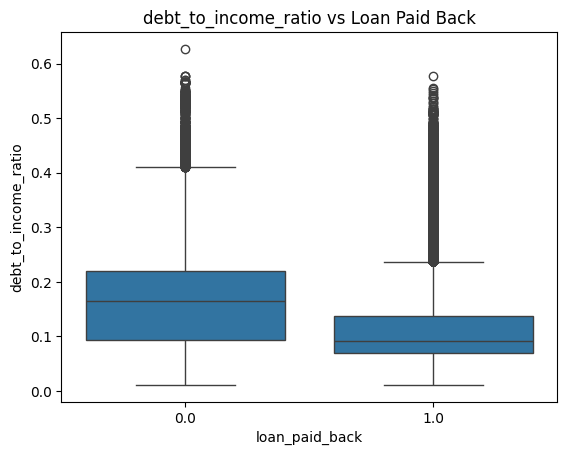

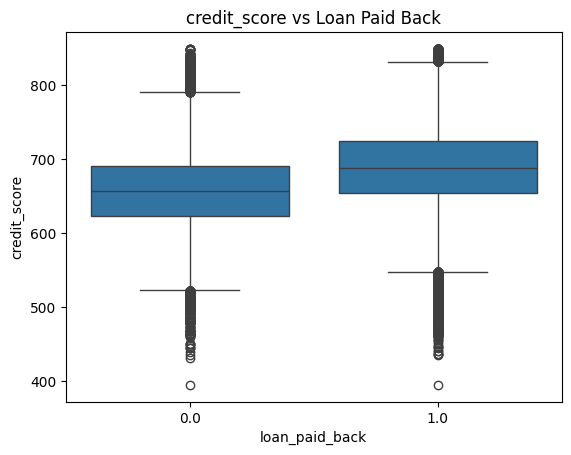

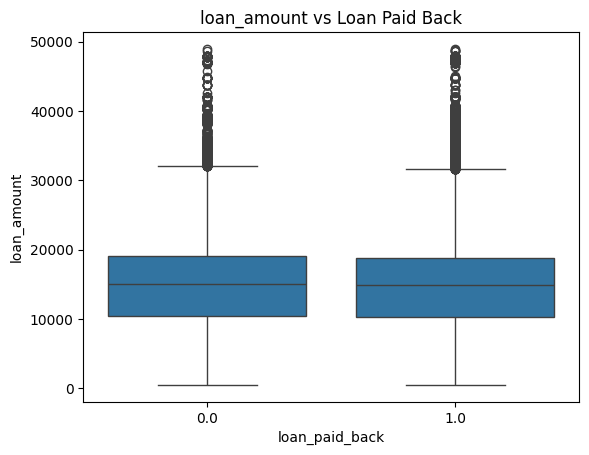

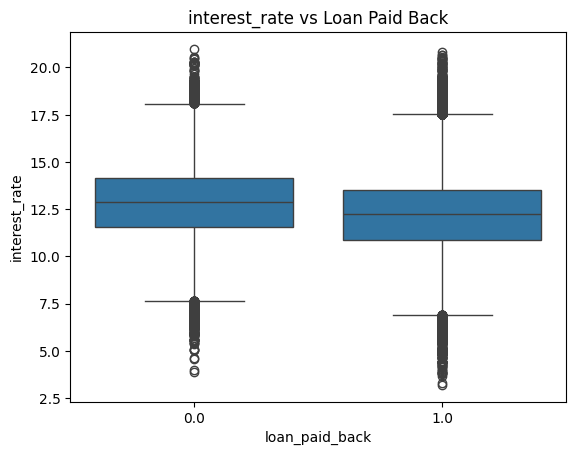

In [58]:
# Let's look at these distributions, when seperating them  between paid and unpaid loans

for col in numeric_cols:
    sns.boxplot(x='loan_paid_back', y=col, data=train_combined_data)
    plt.title(f'{col} vs Loan Paid Back')
    plt.show()

From the above, without any suprises, we can see that:

- Higher debt to income ratio
- Higher interest rates
- And lower credit scores


However, this doesn't really consider the interactions with the categorical features

# Modelling

Let's do a PCA plot to examine the variance of the dataset

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plot_df = combined_data.filter(pl.col('source') == 'train').drop('source')

# Select numeric features (exclude target)
target = 'loan_paid_back'
features = [col for col in  plot_df.columns if col != target]   

# Convert to NumPy for sklearn
X = plot_df.select(features).to_numpy()
y = plot_df[target].to_numpy()



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.09320453 0.08161121]


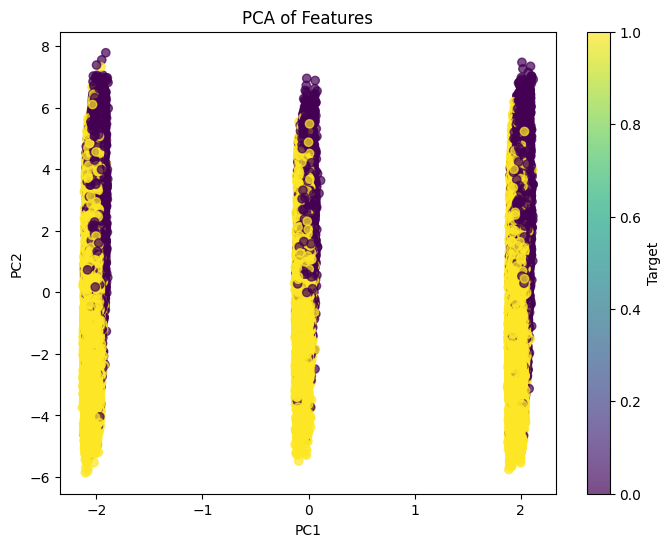

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=plot_df[target].to_numpy(), cmap="viridis", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Features")
plt.colorbar(label="Target")
plt.show()


Ok, the first 2 features are not really good at capturing the variance

Let's look at more features

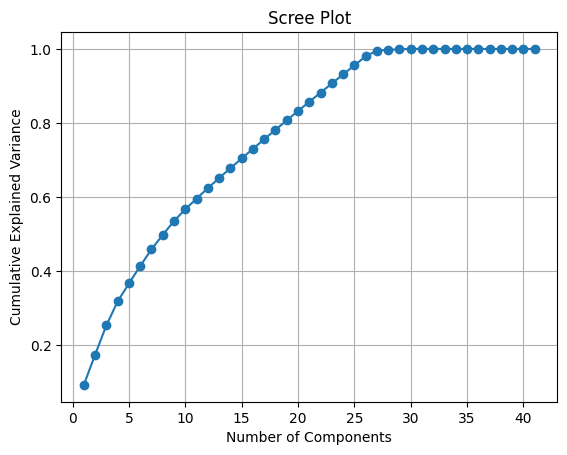

In [62]:
import matplotlib.pyplot as plt

pca_full = PCA()
pca_full.fit(X_scaled)
plt.plot(range(1, len(features)+1), pca_full.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

Ok, we can see that after 25 components, we can explain all the variance

Let's look at tree-mased models 

### Decision Trees

Best max_depth: 6, Highest CV score: 0.9017


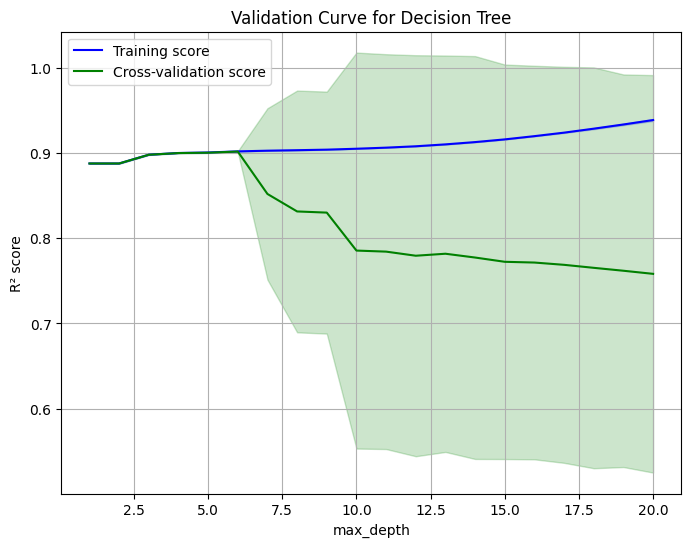

In [69]:
# Model Test: Decision Tree

# Let's examine how well we can get this model to work
 

# -------------------------------
# 2️⃣ Define Models
# -------------------------------
 
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier   
import matplotlib.pyplot as plt
import numpy as np

# Example range of max_depth values
param_range = np.arange(1, 21)

train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(random_state=42),
    X, y,
    param_name="max_depth",
    param_range=param_range,
    cv=5,
    scoring="accuracy",  
    n_jobs=-1
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Find best value and score
best_idx = np.argmax(test_mean)
best_param = param_range[best_idx]
best_score = test_mean[best_idx]

print(f"Best max_depth: {best_param}, Highest CV score: {best_score:.4f}")

# Plot
plt.figure(figsize=(8,6))
plt.plot(param_range, train_mean, label="Training score", color="blue")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(param_range, test_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")
plt.xlabel("max_depth")
plt.ylabel("R² score")
plt.title("Validation Curve for Decision Tree")
plt.legend()
plt.grid(True)
plt.show()


In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from datetime import datetime

def decision_tree_predict_polars(train_df, test_df, feature_cols, target_col, model=None, n_splits=5):
    """
    Train a DecisionTreeClassifier on Polars DataFrames with K-fold CV, apply StandardScaler,
    and return predictions on test data.

    Parameters:
    -----------
    train_df     : pl.DataFrame, training data
    test_df      : pl.DataFrame, test data
    feature_cols : list of column names to use as features
    target_col   : str, name of the target column
    model        : sklearn classifier, optional (default=DecisionTreeClassifier)
    n_splits     : int, number of CV folds (default=8)

    Returns:
    --------
    y_pred       : np.array, predictions on test_df
    """
    Max_depth = 6

    model = DecisionTreeClassifier(random_state=42, max_depth=Max_depth)
    
    # Convert Polars to NumPy
    X_train = train_df.select(feature_cols).to_numpy()
    y_train = train_df[target_col].to_numpy()
    X_test = test_df.select(feature_cols).to_numpy()
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # K-Fold CV
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_scores = []
    for train_idx, val_idx in kf.split(X_train_scaled):
        X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]
        
        model.fit(X_tr, y_tr)
        score = model.score(X_val, y_val)  # accuracy
        cv_scores.append(score)
    
    print(f"Mean CV accuracy ({n_splits}-fold): {np.mean(cv_scores):.4f}, Std: {np.std(cv_scores):.4f}")
    
    # Fit on full training set and predict test set
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Save the result in submission format
    test_df_with_pred = test_df.select(['id']).with_columns(pl.Series(name=target, values=y_pred))

    # Save prediction 

    # Get current time
    current_time = datetime.now()

    # Format as YYYYMMDDHHMMSS
    timestamp = current_time.strftime("%Y%m%d%H%M%S")

    test_df_with_pred.write_csv(f'../Results/Decision_Tree_K_{Max_depth}_{timestamp}.csv')

    return test_df_with_pred


In [ ]:
target = 'loan_paid_back'
features = [col for col in  plot_df.columns if col not in  (target, 'source')]   

predictions = decision_tree_predict_polars(
    train_df=combined_data.filter(pl.col('source') == 'train'),
    test_df=combined_data.filter(pl.col('source') != 'train'),
    feature_cols=features,
    target_col=target
)

### Model X